# Übungsblatt 7 #

### Alice Ziegler, Daniel Schneider ###

## Aufgabe 7.1: Lineare Diskriminanz: Gradient ##

$$
\begin{align}
E(w, w_0|X) &= - {\sum_{1<= i <= N}(t_i\ log\ y_i + (1-t_i)log(1-y_i))} \\
{\frac{\delta\ E}{\delta\ w_j}} &=  - {\sum_{1<= i <= N}(t_i \frac{1}{y_i} \frac{\delta\ y_i}{\delta\ w_j} + (1-t_i) \frac{1}{1-y_i} (-\frac{\delta\ y_i}{\delta\ w_j}))}\\
{\frac{\delta\ E}{\delta\ w_j}} &= - {\sum_{1<= i <= N}(\frac{t_i}{y_i}-\frac{1-t_i}{1-y_i})}\frac{\delta\ y_i}{\delta\ w_j} \\
{\frac{\delta\ E}{\delta\ w_j}} &= - {\sum_{1<= i <= N}(\frac{t_i - t_iy_i - y_i+t_iy_i}{y_i(1-y_i)})}\frac{\delta\ y_i}{\delta\ w_j} \\
{\frac{\delta\ E}{\delta\ w_j}} &= - {\sum_{1<= i <= N}(\frac{t_i - y_i}{y_i(1-y_i)} \frac{\delta\ y_i}{\delta\ w_j})}\\
{\frac{\delta\ E}{\delta\ w_j}} &= - {\sum_{1<= i <= N}(\frac{t_i - y_i}{y_i(1-y_i)} y_i(1-y_i)\frac{\delta (w^Tx_i+w_0)}{\delta w_j})}\ (siehe\ Grundlagen)\\
für\ w_j: \\
{\frac{\delta\ E}{\delta\ w_j}} &= - {\sum_{1<= i <= N}(t_i - y_i)x_{ij}}\\
\Delta w_j &= -\eta{\frac{\delta\ E}{\delta\ w_j}}\ damit\ gilt\ für\\
\Delta w_j &= \eta {\sum_{1<= i <= N}(t_i - y_i)x_{ij}}\\
für\ w_0: \\
{\frac{\delta\ E}{\delta\ w_0}} &= - {\sum_{1<= i <= N}(t_i - y_i)}\\
\Delta w_0 &= -\eta{\frac{\delta\ E}{\delta\ w_0}}\ damit\ gilt\ für\\
\Delta w_0 &= \eta{\sum_{1<= i <= N}(t_i - y_i)}\\
Grundlagen: \\
y_i &= sigmoid(w^Tx_i+w_0)\\
\frac{\delta\ y_i}{\delta\ w_j} &= y_i(1-y_i)\frac{\delta (w^Tx_i+w_0)}{\delta w_j}
\end{align}
$$ 

## Aufgabe 7.2: Logistische Diskriminanz ##

In [1]:
import pandas as pd
import random
import math

#### Laden des `Haberman`-Datensatzes ####

In [2]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
    header=None,
    names = ["age", "year", "axillary_nodes", "survival"]
)

In [3]:
data["survival"] = data["survival"].subtract(1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
year              306 non-null int64
axillary_nodes    306 non-null int64
survival          306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### Algorithmus für lineare Diskriminanz ####

In [5]:
def absListDist(list1, list2):
    return [abs(i-j) for (i,j) in zip(list1, list2)]

In [6]:
def convergence(wNew, wOld):
    if (type(wNew[0]) == type(wOld[0])):
        return (max(absListDist(wNew, wOld)) < 1e-3)
    else:
        return False

In [7]:
def sigmoid(x):
    return (1/(1+math.exp(-x)))

In [57]:
def logisticDiscrimination(data, classAttribute):
    
    data2 = data.copy()
    
    data2['ones'] = 1
    
    cols = list(data2.columns.values)
    cols = [cols[len(cols)-1]] + cols[0:(len(cols)-1)]
    
    data2 = data2.reindex_axis(cols,axis=1)
    
    t = data2[classAttribute]
    dataW = data2.drop(classAttribute, axis=1)
    
    N, d = dataW.shape
    
    wCurr = [None]*d
    wPrev = [None]*d
    deltaW = [None]*d
    
    nu = 1e-4
    
    for j in range(d):
        wCurr[j] = random.uniform(-0.01,0.01)
    
    while not convergence(wCurr,wPrev):
        
        for j in range(d):
            deltaW[j] = 0
            wPrev[j] = wCurr[j]
        
        for i in range(N):
            temp = 0
            
            for j in range(d):
                temp += wCurr[j] * dataW[cols[j]][i]
            
            y = sigmoid(temp)
            
            for j in range(d):
                deltaW[j] += (t[i] - y) * dataW[cols[j]][i]
        
        for j in range(d):
            wCurr[j] += nu * deltaW[j]
    
        nu *= 0.9
    return wCurr

#### Durchführung der Klassifizierung und berechnung des Fehlers ####

In [50]:
def classify(data, ws):
    data2 = data.copy()
    
    data2['ones'] = 1
    
    cols = list(data2.columns.values)
    cols = [cols[len(cols)-1]] + cols[0:(len(cols)-1)]
    
    data2 = data2.reindex_axis(cols,axis=1)
    
    N, d = data2.shape
    
    c = [None]*N
    
    for i in range(N):
        
        c[i] = 0
        for j in range(d):
            c[i] = c[i] + ws[j] * data2[cols[j]][i]
        
        if(c[i] > 0):
            c[i] = 1
        else:
            c[i] = 0
    
    return c

In [51]:
testing = data.sample(int(data.shape[0]/2),)
training = data.drop(testing.index)

testing.reset_index(drop=True,inplace=True)
training.reset_index(drop=True,inplace=True)

In [52]:
testingNoClass = testing.drop('survival',axis=1)

In [58]:
ws = logisticDiscrimination(training, 'survival')

In [59]:
classes = classify(testingNoClass,ws)

In [55]:
def errorRate(orig, generated):
    err = 0
    for h in range(len(orig)):
        if orig[h] != generated[h]:
            err += 1
            
    return err/len(orig)

In [60]:
rightPercent = (1 - errorRate(testing['survival'],classes))*100
print("In "+str(rightPercent)+"% der Fälle lag der Klassifizierer richtig")

In 75.16339869281046% der Fälle lag der Klassifizierer richtig


## Aufgabe 7.3: Support Vector Machine ##

### a) Generieren der Datensätze ###

In [16]:
import numpy as np

In [17]:
def data_generator(intercept, slope, size):
    def f(x): 
        return (slope*x + intercept)
    
    random.seed(1337)
    data = []
    
    for _ in range (size):
        while True:
            x = random.random()
            y = random.random()
            label = 1 if f(x) > y else -1
            
            if abs(f(x) - y) > 0.1:
                break ;
        
        data.append((x, y, label))
    return data

    

In [18]:
size = 100

In [19]:
gen1 = np.asarray(data_generator(-0.1,0.7,size))
gen1NoClass = gen1[:,0:2]

In [20]:
gen2 = np.asarray(data_generator(0.1,2.0,size))
gen2NoClass = gen2[:,0:2]

In [21]:
gen3 = np.asarray(data_generator(0.75,-0.2,size))
gen3NoClass = gen3[:,0:2]

In [22]:
gen4 = np.asarray(data_generator(1.0,-1.0,size))
gen4NoClass = gen4[:,0:2]

### b) Lernen der Trennebene ###

In [23]:
import scipy.optimize as sco

In [24]:
def minimize(data,classID):
    N = data.shape[0]
    
    xs = np.c_[np.ones(N), data]
    #print(xs)
    
    ts = xs[:,classID]
    xs = np.delete(xs, [classID], axis=1)
    
    N,d = xs.shape
    
    wInit = np.empty([d,1])
    for j in range(d):
        wInit[j] = random.uniform(-0.01,0.01)
    
    #print(wInit)
    #print(np.square(wInit))
    #print(xs)
    #print((np.dot(np.transpose(wInit), np.transpose(xs))))
    #print(ts)
    #print(ts * (np.dot(np.transpose(wInit), np.transpose(xs))))
    
    return sco.minimize(
        fun = lambda ws: (1/2 * np.square(np.linalg.norm(ws))),
        x0 = wInit,
        constraints = {'type': 'ineq', 'fun': (lambda ws: (ts * (np.dot(np.transpose(ws), np.transpose(xs))).flatten() - 1))}
    )

In [25]:
res1 = minimize(gen1,3)

In [26]:
res2 = minimize(gen2,3)

In [27]:
res3 = minimize(gen3,3)

In [28]:
res4 = minimize(gen4,3)

### c) Plotten der Daten und Trennlinien ###

In [29]:
import matplotlib.pyplot as plt

#### Berechnung der Trennlinie ####

In [30]:
def evaluateFunction(xs,ws):
    ys = np.empty_like(xs)
    
    for i in range(xs.shape[0]):
        ys[i] = - (ws[0] + ws[1]*xs[i])/ws[2]
    
    return ys

#### Plotten der Punkte und Trennlinien ####

In [31]:
xVals = np.arange(0,1, 0.01)

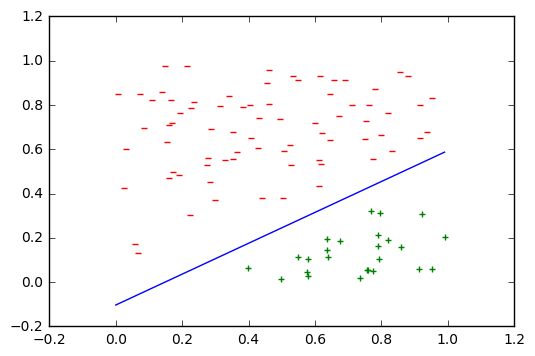

In [32]:
gen1ClassMinus = gen1[gen1[:,2] == -1]
gen1ClassPlus = gen1[gen1[:,2] == 1]

plt.scatter(gen1ClassMinus[:,0],gen1ClassMinus[:,1],marker="_", c="red")
plt.scatter(gen1ClassPlus[:,0],gen1ClassPlus[:,1],marker="+", c="green")

abline1 = evaluateFunction(xVals,res1.x)
plt.plot(xVals,abline1,c="blue")

plt.show()

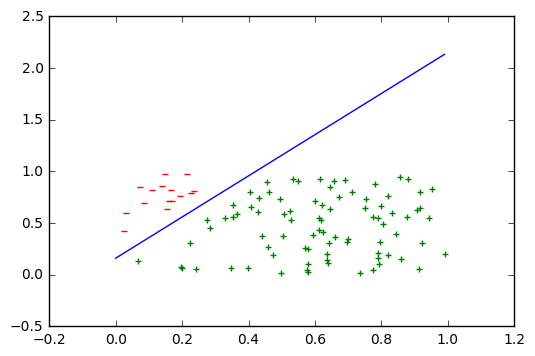

In [33]:
gen2ClassMinus = gen2[gen2[:,2] == -1]
gen2ClassPlus = gen2[gen2[:,2] == 1]

plt.scatter(gen2ClassMinus[:,0],gen2ClassMinus[:,1],marker="_", c="red")
plt.scatter(gen2ClassPlus[:,0],gen2ClassPlus[:,1],marker="+", c="green")

abline2 = evaluateFunction(xVals,res2.x)
plt.plot(xVals,abline2,c="blue")

plt.show()

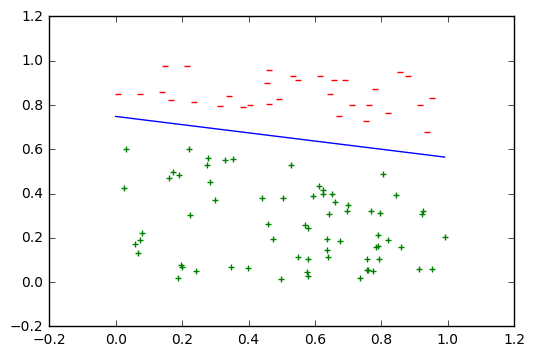

In [34]:
gen3ClassMinus = gen3[gen3[:,2] == -1]
gen3ClassPlus = gen3[gen3[:,2] == 1]

plt.scatter(gen3ClassMinus[:,0],gen3ClassMinus[:,1],marker="_", c="red")
plt.scatter(gen3ClassPlus[:,0],gen3ClassPlus[:,1],marker="+", c="green")

abline3 = evaluateFunction(xVals,res3.x)
plt.plot(xVals,abline3,c="blue")

plt.show()

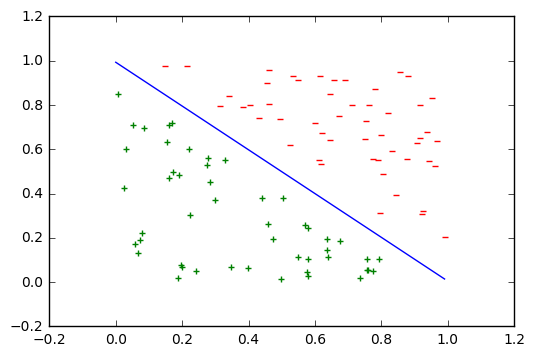

In [35]:
gen4ClassMinus = gen4[gen4[:,2] == -1]
gen4ClassPlus = gen4[gen4[:,2] == 1]

plt.scatter(gen4ClassMinus[:,0],gen4ClassMinus[:,1],marker="_", c="red")
plt.scatter(gen4ClassPlus[:,0],gen4ClassPlus[:,1],marker="+", c="green")

abline4 = evaluateFunction(xVals,res4.x)
plt.plot(xVals,abline4,c="blue")

plt.show()

#### Durchführung der Klassifizierung der Daten und berechnung des Fehlers ####

In [36]:
def compareClasses(classes1,classes2):
    errors = 0
    
    for i in range(classes1.shape[0]):
        if classes1[i] != classes2[i]:
            errors += 1
    
    return errors

In [37]:
classify1 = np.dot(np.transpose(res1.x), np.transpose(np.c_[np.ones(gen1NoClass.shape[0]), gen1NoClass]))

In [38]:
classify2 = np.dot(np.transpose(res2.x), np.transpose(np.c_[np.ones(gen2NoClass.shape[0]), gen2NoClass]))

In [39]:
classify3 = np.dot(np.transpose(res3.x), np.transpose(np.c_[np.ones(gen3NoClass.shape[0]), gen3NoClass]))

In [40]:
classify4 = np.dot(np.transpose(res4.x), np.transpose(np.c_[np.ones(gen4NoClass.shape[0]), gen4NoClass]))

In [41]:
compareClasses(gen1[:,2] > 0, classify1 > 0)

0

In [42]:
compareClasses(gen2[:,2] > 0, classify2 > 0)

0

In [43]:
compareClasses(gen3[:,2] > 0, classify3 > 0)

0

In [44]:
compareClasses(gen4[:,2] > 0, classify4 > 0)

0

Die Klassifizierung stimmt in allen Fällen mit den ursprünglichen Klassen überein, die Daten wurden also durch die Klassifizierung vollständig getrennt